In [1]:
# The 10-armed Testbed, Figure 2.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision = 2, suppress = True) # pretty print arrays

In [3]:
def environment(k = 10):
    """Returns actual values and rewards for 1000 timesteps."""
    Q_s = np.random.normal(size = k)
    R = []

    for t in range(1000):
        R_t = np.random.normal(Q_s)
        R.append(R_t)
        
    return Q_s, np.array(R)

In [4]:
def agent():
    """Initiates estimated values, rewards collected and action counts."""
    Q = np.zeros(10)
    r = np.zeros(10)
    n_a = np.zeros(10)
    return Q, r, n_a

In [5]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_values = np.flatnonzero(Q == Q.max())
    return np.random.choice(best_values)

In [6]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty."""
    options = ['greedy', 'epsilon']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'epsilon':
        return np.random.choice(np.arange(Q.size))

In [7]:
def learn(Q, action, r, n_a):
    """Updates value estimate using the sample-average method."""
    Q[action] = r[action] / n_a[action]
    return Q

In [8]:
def run(epsilon, runs):
    """Return average behavior for given epsilon and runs."""
    avg_rewards_list = []

    for run in range(runs):
        Q_s, R = environment()
        Q, r, n_a = agent()
        avg_rewards = []

        for t, state in enumerate(R):
            action = epsilon_greedy(Q, epsilon)
            reward = state[action]
            n_a[action] += 1
            r[action] += reward
            avg_reward = r.sum() / (t + 1)
            avg_rewards.append(avg_reward)
            Q = learn(Q, action, r, n_a)

        avg_rewards_list.append(np.array(avg_rewards))
        
    avg_behavior = [np.array(avg_rewards_list)[:, x].sum() / runs for x in range(1000)]
    return avg_behavior

In [9]:
# running for epsilon = 0, 0.01 and 0.1

runs = 20

avg_behavior_first = run(0, runs); print('First run complete.')
avg_behavior_second = run(0.01, runs); print('Second run complete.')
avg_behavior_third = run(0.1, runs); print('Third run complete.')

First run complete.
Second run complete.
Third run complete.


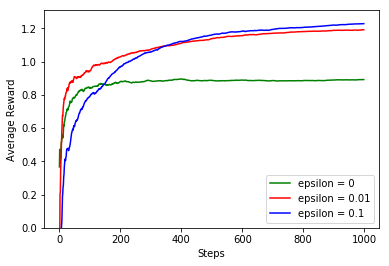

In [10]:
# plotting the results

plt.plot(avg_behavior_first, color = 'green', label = 'epsilon = 0')
plt.plot(avg_behavior_second, color = 'red', label = 'epsilon = 0.01')
plt.plot(avg_behavior_third, color = 'blue', label = 'epsilon = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.ylim(bottom = 0)
plt.legend()

plt.show()